# **Manipulador robótico con 3 grados de libertad**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [1]:
import numpy as np
from sympy import*
from IPython.display import Image
import matplotlib.pyplot as plt

init_printing()

In [2]:
Image(url='../Examples/3.png')

In [3]:
Image(url='../Examples/4.png')

Vamos a descrbir el algebra simula la dinámica directa del anterior brazo robótico

In [4]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
theta_3 = symbols("theta_3",  real=True)
alpha = symbols("alpha",  real=True)

l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)
l_3 = symbols("l_3",  real=True)

Rotación de la base (articulación 1) un angulo theta zobre el eje z

In [5]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Translación l_1 sobre el eje z desde la base hasta la articulación 2

In [6]:
_1H2 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, l_1], [0, 0, 0, 1]])
_1H2


⎡1  0  0  0 ⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  l₁⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Rotación del sistema de referencia (90 grados sobre el eje X)

In [7]:
_2H3 = Matrix([[1, 0, 0, 0], [0, cos(alpha), -sin(alpha), 0], [0, sin(alpha), cos(alpha), 0], [0, 0, 0, 1]])
_2H3

⎡1    0        0     0⎤
⎢                     ⎥
⎢0  cos(α)  -sin(α)  0⎥
⎢                     ⎥
⎢0  sin(α)  cos(α)   0⎥
⎢                     ⎥
⎣0    0        0     1⎦

In [8]:
_2H3 = _2H3.subs(alpha, pi/2)
_2H3

⎡1  0  0   0⎤
⎢           ⎥
⎢0  0  -1  0⎥
⎢           ⎥
⎢0  1  0   0⎥
⎢           ⎥
⎣0  0  0   1⎦

Rotación theta_2 sobre el nuevo eje Z en la articulación 2

In [9]:
_3H4 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_3H4


⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Translación l_2 sobre el nuevo eje X desde la articulación 2 hasta la articulación 3

In [10]:
_4H5 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_4H5


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Rotación theta_3 sobre el nuevo eje Z para la articulación 3

In [11]:
_5H6 = Matrix([[cos(theta_3), -sin(theta_3), 0, 0], [sin(theta_3), cos(theta_3), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_5H6


⎡cos(θ₃)  -sin(θ₃)  0  0⎤
⎢                       ⎥
⎢sin(θ₃)  cos(θ₃)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Traslación l_3 desde la articulación 3 hasta el efector final (muñeca)

In [12]:
_6H7 = Matrix([[1, 0, 0, l_3], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_6H7

⎡1  0  0  l₃⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Para encontrar la posición y la orientación del sistema de referencia W3 respecto a W0 se puede realizar la composición de las transformaciones de cada estado, así:

In [13]:
H = simplify(_0H1@_1H2@_2H3@_3H4@_4H5@_5H6@_6H7)
H

⎡cos(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₂ + θ₃)⋅cos(θ₁)  sin(θ₁)   (l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅cos(θ₁)⎤
⎢                                                                                             ⎥
⎢sin(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₁)⋅sin(θ₂ + θ₃)  -cos(θ₁)  (l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅sin(θ₁)⎥
⎢                                                                                             ⎥
⎢    sin(θ₂ + θ₃)          cos(θ₂ + θ₃)          0        l₁ + l₂⋅sin(θ₂) + l₃⋅sin(θ₂ + θ₃)   ⎥
⎢                                                                                             ⎥
⎣         0                      0               0                        1                   ⎦

Esta será la posición final de la muñeca en función de theta1, theta2, theta3, l1, l2 y l3

In [14]:
P = H[0:3, 3]
P

⎡(l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅cos(θ₁)⎤
⎢                                      ⎥
⎢(l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅sin(θ₁)⎥
⎢                                      ⎥
⎣  l₁ + l₂⋅sin(θ₂) + l₃⋅sin(θ₂ + θ₃)   ⎦

Y esta será la orientación final de la muñeca en función theta1, theta2, theta3, l1, l2 y l3

In [15]:
R = H[0:3, 0:3]
R

⎡cos(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₂ + θ₃)⋅cos(θ₁)  sin(θ₁) ⎤
⎢                                                     ⎥
⎢sin(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₁)⋅sin(θ₂ + θ₃)  -cos(θ₁)⎥
⎢                                                     ⎥
⎣    sin(θ₂ + θ₃)          cos(θ₂ + θ₃)          0    ⎦

## Taller

Suponga un manipulador robotico con 3 grados de libertad. la base mide 40cm El brazo mide 50cm y el ante brazo mide 50cm y el tecer brazo  Los angulos de rotación no tienen restricciones. Suponga que la muñeca puede agarrar cualquier objeto que se encuentre a menos de 5cm de ella.

* Determine al menos 2 configuraciones de theta1, theta2 y theta3 que permitan alcanzar un objeto en la posición x=45, y=36, z=22. Utilice fuerza bruta para ello o cualquier estrategia objetiva para conseguirlo.

## Calificación

Los tres grupos con el mejor avance antes de finalizar la clase tendrá puntos extras en la calificación del corte, así:

* Mejor avance --> 0.3
* Segundo mejor avance --> 0.2
* Tercer mejor avance --> 0.1

Se encontraron las siguientes configuraciones válidas:
Solución 1: θ1 = 36.36°, θ2 = -73.94°, θ3 = 105.45°
Solución 2: θ1 = 36.36°, θ2 = -73.94°, θ3 = 107.88°


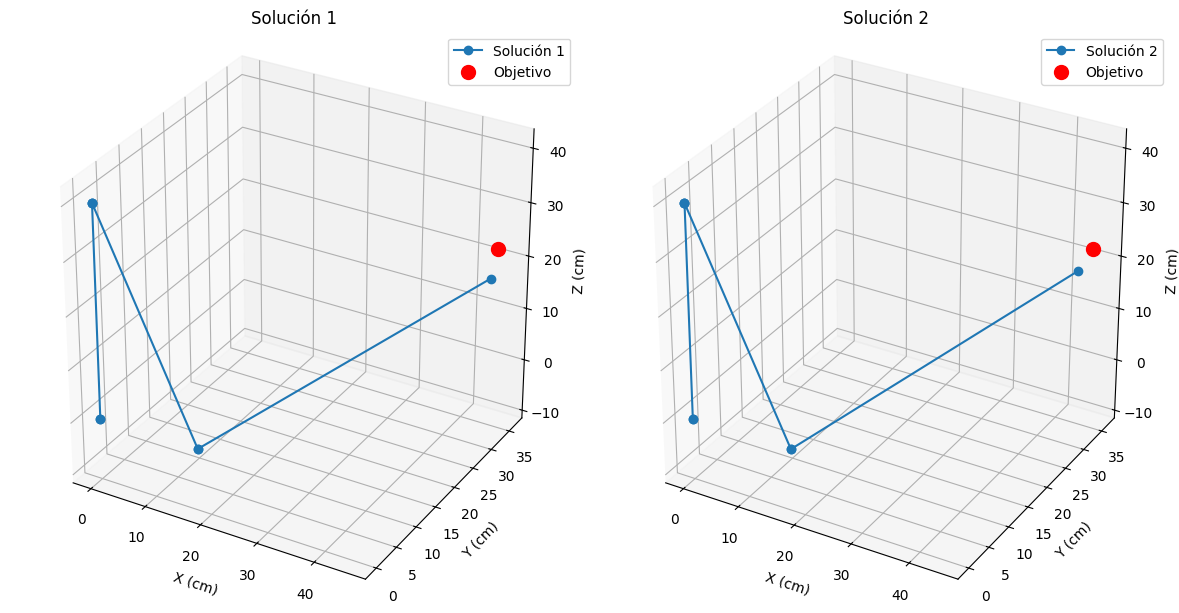

In [16]:
# Dimensiones del manipulador
"""
longitud1: Longitud del primer segmento del manipulador (desde la base hasta la articulación siguiente).
longitud2: Longitud del segundo segmento del manipulador.
longitud3: Longitud del tercer segmento del manipulador (incluye el efector final).
"""
longitud1 = 40  # cm
longitud2 = 50
longitud3 = 50

# Posición objetivo y tolerancia
"""
objetivo: Coordenadas (x, y, z) de la posición deseada para el efector final.
muñeca: Tolerancia máxima permitida en cm para considerar que la posición calculada es válida.
"""
objetivo = np.array([45, 36, 22])
muñeca = 5  # cm

# Rangos de búsqueda para los ángulos
"""
rango_theta1: Valores angulares posibles para θ1, correspondiente a la rotación de la base.
rango_theta2: Valores angulares posibles para θ2, correspondiente a la articulación del segundo segmento.
rango_theta3: Valores angulares posibles para θ3, correspondiente a la articulación del tercer segmento.
"""
rango_theta1 = np.linspace(0, 2 * np.pi, 100)  # Rotación completa de la base
rango_theta2 = np.linspace(-2 * np.pi / 3, 2 * np.pi / 3, 100)  # Rango limitado de articulación
rango_theta3 = np.linspace(-2 * np.pi / 3, 2 * np.pi / 3, 100)  # Rango limitado de articulación

# Buscar soluciones válidas
"""
soluciones: Lista para almacenar las configuraciones angulares válidas (θ1, θ2, θ3) junto con las matrices de transformación.
contador: Variable para contar el número de configuraciones válidas encontradas.
"""
soluciones = []
contador = 0

# Bucle para calcular configuraciones válidas
"""
Se realiza una búsqueda exhaustiva iterando sobre cada combinación de θ1, θ2, y θ3.
Cada configuración se evalúa generando la cadena cinemática completa mediante matrices de transformación homogénea.
Si la posición calculada del efector final está dentro de la tolerancia especificada, la configuración se almacena.
"""
for theta1 in rango_theta1:
    for theta2 in rango_theta2:
        for theta3 in rango_theta3:
            # Matrices de transformación homogénea
            """
            H01, H12, H23, H34, H45, H56, H67:
            Cada matriz representa la transformación entre dos puntos en el espacio (por ejemplo, entre eslabones de un brazo robótico).
            Estas matrices 4x4 incluyen:
            - Rotaciones (orientación de un eslabón respecto al anterior).
            - Traslaciones (posición relativa entre eslabones).
            Se utilizan para describir cómo se mueve y orienta cada parte del sistema en el espacio tridimensional.
            ¿Por qué se usa NumPy aquí?
            NumPy es ideal para este tipo de operaciones porque:
            - Permite crear y manejar matrices y vectores de forma eficiente.
            - Tiene funciones optimizadas para multiplicación de matrices, productos cruzados, y más.
            - Es muy rápido y preciso para cálculos numéricos como los que se necesitan en robótica.
              Por eso, todas las matrices de transformación homogénea (como H01, H12, etc.) se implementan como arrays de NumPy.
            """
            H01 = np.array([
                [np.cos(theta1), -np.sin(theta1), 0, 0],
                [np.sin(theta1),  np.cos(theta1), 0, 0],
                [0,               0,              1, 0],
                [0,               0,              0, 1]
            ])
            H12 = np.array([
                [1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, longitud1],
                [0, 0, 0, 1]
            ])
            H23 = np.array([
                [1, 0,  0, 0],
                [0, 0, -1, 0],
                [0, 1,  0, 0],
                [0, 0,  0, 1]
            ])
            H34 = np.array([
                [np.cos(theta2), -np.sin(theta2), 0, 0],
                [np.sin(theta2),  np.cos(theta2), 0, 0],
                [0,               0,              1, 0],
                [0,               0,              0, 1]
            ])
            H45 = np.array([
                [1, 0, 0, longitud2],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]
            ])
            H56 = np.array([
                [np.cos(theta3), -np.sin(theta3), 0, 0],
                [np.sin(theta3),  np.cos(theta3), 0, 0],
                [0,               0,              1, 0],
                [0,               0,              0, 1]
            ])
            H67 = np.array([
                [1, 0, 0, longitud3],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]
            ])

            # Calcular la cadena cinemática completa
            """
            Las matrices se multiplican secuencialmente para obtener la posición final del efector en el espacio.
            """
            matrices = [H01, H12, H23, H34, H45, H56, H67]
            H = np.eye(4)  # Inicializar matriz de identidad
            for matriz in matrices:
                H = H @ matriz

            posicion = H[0:3, 3]  # Extraer la posición final del efector
            distancia = np.linalg.norm(posicion - objetivo)  # Calcular distancia al objetivo

            # Evaluar si la posición calculada cumple con la tolerancia
            if distancia <= muñeca:
                soluciones.append((theta1, theta2, theta3, matrices))  # Almacenar configuración válida
                contador += 1  # Incrementar contador de soluciones

            # Detener la búsqueda si se alcanzan las soluciones necesarias
            if contador >= 2:
                break
        if contador >= 2:
            break
    if contador >= 2:
        break

# Mostrar y graficar soluciones válidas
"""
Se muestra información detallada de cada solución válida encontrada y se visualiza el manipulador en un espacio 3D.
Cada configuración se grafica con los segmentos conectados, y la posición objetivo se marca en rojo.
"""
if soluciones:
    print("Se encontraron las siguientes configuraciones válidas:")
    fig = plt.figure(figsize=(12, 6))

    for idx, (theta1, theta2, theta3, matrices) in enumerate(soluciones[:2]):
        print(f"Solución {idx + 1}: θ1 = {np.degrees(theta1):.2f}°, θ2 = {np.degrees(theta2):.2f}°, θ3 = {np.degrees(theta3):.2f}°")

        # Reutilizar las matrices ya guardadas
        H = np.eye(4)
        puntos = [np.array([0, 0, 0])]  # Inicializar lista de puntos
        for matriz in matrices:
            H = H @ matriz
            puntos.append(H[0:3, 3])
        puntos = np.array(puntos)

        # Graficar manipulador
        ax = fig.add_subplot(1, 2, idx + 1, projection='3d')
        ax.plot(puntos[:, 0], puntos[:, 1], puntos[:, 2], '-o', label=f'Solución {idx+1}')
        ax.scatter(*objetivo, color='r', label='Objetivo', s=100)  # Marcar posición objetivo
        ax.set_title(f'Solución {idx + 1}')
        ax.set_xlabel('X (cm)')
        ax.set_ylabel('Y (cm)')
        ax.set_zlabel('Z (cm)')
        ax.legend()
        ax.set_box_aspect([1, 1, 1])
        ax.grid(True)

    plt.tight_layout()
    plt.show()

else:
    print("No se encontraron soluciones válidas.")


Esta gráfica nos permite verificar que las configuraciones encontradas para  los angulos que posicionan al efector final correctamente a una distancía donde el brazo pueda alcanzar 5cm, constactamos tambien que la conbinación aporta logicamente al direccionamiento final. Además permite eficiencia del código al detener la iteracción cuando encuentre al menos 2 soluciones al ejercicio planteado. Identificando visualmente la convergencia hacia el punto previsto. Identificando así ejemplos y posibles proyecciones en las trayectorias futuras pensadas dentro del margen estblecido.
